In [1]:
from datascience import *
import numpy as np
import math
import scipy.stats as stats

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Problem 1. 

Chronic exposure to asbestos fiber is a well-known health hazard. The article “The Acute Effects of Chrysotile Asbestos Exposure on Lung Function in the journal Envir. Res., 1978: 360-372 reports results of a study based on a sample of construction workers who had been exposed to asbestos over a prolonged period. 

Among the data given in the article were the following (ordered) values of pulmonary compliance (cm3/cm H20) for each of 16 subjects eight months after the exposure period (pulmonary compliance is a measure of lung elasticity, or how effectively the lungs are able to inhale and exhale):

In [2]:
PulComp = make_array(167.9, 180.8, 184.8, 189.8, 194.8, 200.2, 
                     201.9, 206.9, 207.2, 208.4, 226.3, 227.7, 
                     228.5, 232.4, 239.8, 258.6)

#### Q1. (2pts) Is the population distribution is normal? We didn't go over the normality test in class. But you can look at the documentation here https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [3]:
stats.normaltest(PulComp, axis=0, nan_policy='propagate')

C:\Users\Yujia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.2455672974202457, pvalue=0.884454994841554)

The population distribution is normal. The p value is larger than a, we can not reject that it is normal distribution.

#### Q2. (3pts) Compute a 95% confidence interval for the true average pulmonary compliance after such exposure. Show all work for full credit and justify using a z or t critical value.

We should use t critical value for n = 16 ≤ 30.

In [4]:
alpha = 0.05

PulCompmean = PulComp.mean()
PulCompmean


209.75

In [5]:
PulComp_mean_std = stats.sem(PulComp)
PulComp_mean_std

6.039046558301512

In [6]:
tcrit = stats.t.ppf(1-alpha/2, 15)
tcrit

2.131449545559323

In [7]:
CI_lower = PulCompmean - tcrit*PulComp_mean_std
CI_upper = PulCompmean + tcrit*PulComp_mean_std
print('The %d%s Confidence Interval is [%.4f, %.4f]'%
      (100*(1-alpha), '%', CI_lower, CI_upper))

The 95% Confidence Interval is [196.8781, 222.6219]


#### Q3. (2pts) A scan of the literature indicates that normal pulmonary compliance is about 250 cm3/cm H20. Is the mean pulmonary compliance from the exposed population statistically significantly different from this hypothetical “normal” value?

Yes. Since the normal pulmonary compliance is 250 cm3/cm H20, which is not included in the confidence interval. We can conclude that pulmonary compliance from the exposed population statistically significantly different from this hypothetical “normal” value.

#### Q4. (3pts) We want to test whether the mean of the exposed group equals the normal group. How would you set up the null hypothesis and alternative hypothesis? What is the p-value? Would you reject the null hypothesis at an significance level of 0.01? 

The hypothesis are
- $H_0$: $\mu=250$
- $H_1$: $\mu\neq 250$.

In [8]:
T_stat = ((PulCompmean - 250)/(PulComp_mean_std))
T_stat = abs(T_stat)

In [9]:
p_value = stats.t.sf(T_stat, 15) 
# sf == survival function, Probability >= T_stat
p_value

3.7724657568347096e-06

Since p_value <  0.01, we have enough evidence to reject the null hypothesis.

## Problem 2.

An investigator hypothesizes that in people free of diabetes, fasting blood glucose, a risk factor for coronary heart disease, is higher in those who drink at least 2 cups of coffee per day. A cross-sectional study is planned to assess the mean fasting blood glucose levels in people who drink at least two cups of coffee per day. 

The mean fasting blood glucose level in people free of diabetes is reported as 95.0 mg/dL with a standard deviation of 15 mg/dL. 

If the mean blood glucose level in people who drink at least 2 cups of coffee per day is 100 mg/dL, this would be important clinically. 

A one-sided test will be used with a 5% level of significance. 

#### Q1.  (2pts) Assume we enrolled a total of $n$ subjects. We will reject the null hypothesis if $\bar X$ is greater than or equal to what value? This should be a funciton of $n$. Note that we are running a *one-sided test*.

- $H_0$: $\mu=95$
- $H_1$: $\mu＞95$ 


In [10]:
population_mean = 95
true_mean = 100
population_std = 15
aloha = 0.05
z_crit = stats.norm.ppf(1-alpha) 
z_crit

1.6448536269514722

In [11]:
def X_mean(n):
    X_mean = z_crit*(population_std/math.sqrt(n))+ population_mean
    return X_mean

𝑋¯ should greater than or equal to X_mean when we reject the null hypothesis

#### Q2. (3pts) Assume $n=50$. What would be the power of the test?

In [12]:
#X_mean(50)

In [13]:
number_of_simulation = 10000

In [14]:
rejectNull = np.empty(number_of_simulation)
for i in range(number_of_simulation):
    IQ = np.random.normal(true_mean, 15, 50)      
    Z_stat = (IQ.mean()-95)/(15/math.sqrt(50))   
    if Z_stat > z_crit:
        rejectNull[i] = True
    else:
        rejectNull[i] = False

print('empirical estimate of power =', rejectNull.sum()/number_of_simulation)

empirical estimate of power = 0.7655


#### Q3. (2pts) What is the power of the test for a general $n$. This should be a function of $n$.

In [15]:
def power(n, number_of_simulation):
    rejectNull = np.empty(number_of_simulation)
    for i in range(number_of_simulation):
        IQ = np.random.normal(true_mean, 15, n)      
        Z_stat = (IQ.mean()-95)/(15/math.sqrt(n))   
        if Z_stat > z_crit:
            rejectNull[i] = True
        else:
            rejectNull[i] = False
    return rejectNull.sum()/number_of_simulation

#### Q4. (3pts) How many patients should be enrolled in the study to ensure that the power of the test is 80%?

100 - Z * 16/math.sqrt(n) = 95 + z_crit * 16/math.sqrt(n)

In [16]:
Z = stats.norm.ppf(0.8)
n=(Z*3 +z_crit*3)**2
n


55.64301508817791

In [17]:
n =56

Let's verify this.

In [18]:
power(56,10000)

0.8074

## Problem 3.

In an effort to link cold environments with hypertension in humans, a preliminary experiment was conducted to investigate the effect of cold on hypertension in rats. Two random samples of 6 rats each were exposed to different environments. One sample of rats was held in a normal environment at 26 Celcius. The other sample was held in a cold 5 Celcius environment. Blood pressures and heart rates were measured for rats for both groups. The blood pressures for the 12 rats are contained in the file `RatBP.csv`.

We wish to test the following hypotheses:
$$H_0: \mu_{26C} = \mu_{5C}$$
$$H_1: \mu_{26C} \neq \mu_{5C}$$

Please conduct an analysis of this data by addressing the following questions.

#### Q1. (3pts) Provide a visual presentation of the data (e.g.stacked histogram) and speculate (before conducting any statistical tests) whether the populations appear different or not.

In [19]:
Q11 = Table.read_table('RatBP.csv')
Q11.show()

Rat,Temp,BloodPressure
1,26,152
2,26,157
3,26,179
4,26,182
5,26,176
6,26,149
7,5,384
8,5,369
9,5,354
10,5,375


In [20]:
Q12 = Table().with_columns('#',np.arange(1,7,1),'26', make_array(152, 157, 179, 182, 176,149), '5', make_array(384, 369, 354, 375, 366, 423))
Q12

#,26,5
1,152,384
2,157,369
3,179,354
4,182,375
5,176,366
6,149,423


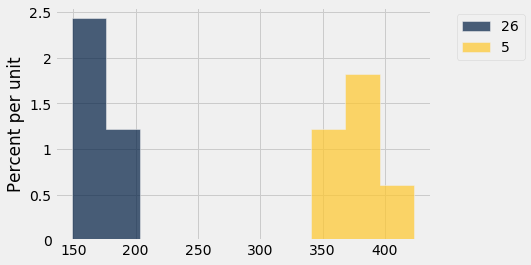

In [21]:
Q12.hist(['26','5'])

The populations appear differently for in 26 the value is around 150-200, in 5 the value is around 350-400.

#### Q2. (4pts) Check on the assumption of equal variances.

Since our data set is pretty small, we cannot really check and thus we will simply assume that the population are normally distributed.

First, we need to decide if the two samples have the same variance. To do that, we need do a F-test of equal variance.

In [22]:
n1 = 6
n2 = 6

control_mean = np.mean(Q12.column(1))
treated_mean = np.mean(Q12.column(2))
control_std = np.std(Q12.column(1), ddof = 1)
treated_std = np.std(Q12.column(2), ddof = 1)

print('control: num_rows =', n1, 
      'mean =',round(control_mean,2), 
      'standard deviation', round(control_std,2))
print('treated: num_rows =', n2,
      'mean =', round(treated_mean,2),
      'standard deviation', round(treated_std,2))

control: num_rows = 6 mean = 165.83 standard deviation 14.77
treated: num_rows = 6 mean = 378.5 standard deviation 23.96


Since our data set is pretty small, we cannot really check and thus we will simply assume that the population are normally distributed. 

First, we need to decide if the two samples have the same variance. To do that, we need do a F-test of equal variance.

In [23]:
F_stat = treated_std**2/control_std**2
pval = 2*stats.f.sf(F_stat, n1-1, n2-1)
pval

0.31206001693857355

Since p-value is more than 0.05, we cannot reject the null hypothesis and thus will conclude that the two samples have the same variances. 

#### Q3. (3pts) Assume normality holds and conduct the appropriate test. Draw some conclusions about the two populations. 

In [24]:
stats.ttest_ind(Q12.column(1), Q12.column(2), equal_var=True)

Ttest_indResult(statistic=-18.50947841456354, pvalue=4.5696247959320855e-09)

Since p-value is less than 0.05, we have enough evidence to reject the null hypothesis and conclude that blood pressures for the 12 rats are different in 5 and 26 environment. 

The sample is very small, so we need more samples and more times. Cold environments might relate to the hypertension in human but we need to find whether it is the same for human in these situations. 

## Problem 4.

A pollution-control inspector suspected that a riverside community was releasing semitreated sewage into a river and this, as a consequence, was changing the level of dissolved oxygen of the river. To check this, he drew 15 randomly selected specimens of river water at a location above the town and another 15 specimens below the town. 

The dissolved oxygen readings, in parts per million, are given in the file `dissolvedO2.csv`. I would like you to answer some questions similar to those posed above only this time for the population of dissolved oxygen levels.

We wish to test the following hypotheses:
$$H_0: \mu_{above} = \mu_{below}$$
$$H_1: \mu_{above} > \mu_{below}$$

#### Q1. (3pts) Provide a visual presentation of the data (e.g. stacked histogram) and speculate (before conducting any statistical tests) whether the populations appear different or not.

In [25]:
Q1 = Table.read_table('dissolvedO2.csv')
Q1.show()

Sample,Location,O2Level
1,Above,5.2
2,Above,4.8
3,Above,5.1
4,Above,5
5,Above,4.9
6,Above,4.8
7,Above,5
8,Above,4.7
9,Above,4.7
10,Above,5


In [26]:
Q1 = Table().with_columns('#',np.arange(1,16,1),'Above', Q1.where('Location', are.equal_to('Above')).column(2), 'Below', Q1.where('Location', are.equal_to('Below')).column(2))
Q1

#,Above,Below
1,5.2,4.2
2,4.8,4.4
3,5.1,4.7
4,5,4.9
5,4.9,4.6
6,4.8,4.8
7,5,4.9
8,4.7,4.6
9,4.7,5.1
10,5,4.3


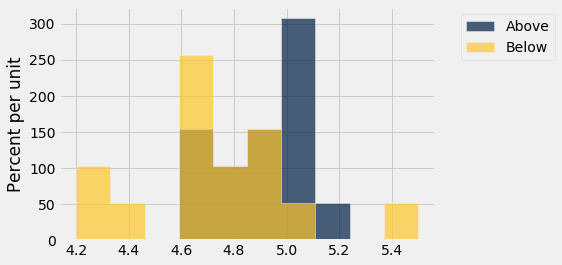

In [27]:
Q1.hist(['Above', 'Below'])

Populations appear different for the range of the Below is wider than the Above. The modes are different. I guess the value of Below is smaller than the Above.

#### Q2. (4pts) Check on the assumption of equal variances.

In [28]:
n1 = 15
n2 = 15

control_mean = np.mean(Q1.column(1))
treated_mean = np.mean(Q1.column(2))
control_std = np.std(Q1.column(1), ddof = 1)
treated_std = np.std(Q1.column(2), ddof = 1)

print('control: num_rows =', n1, 
      'mean =',round(control_mean,2), 
      'standard deviation', round(control_std,2))
print('treated: num_rows =', n2,
      'mean =', round(treated_mean,2),
      'standard deviation', round(treated_std,2))

control: num_rows = 15 mean = 4.92 standard deviation 0.16
treated: num_rows = 15 mean = 4.74 standard deviation 0.32


In [29]:
F_stat = treated_std**2/control_std**2
pval = (stats.f.sf(F_stat, n1-1, n2-1))
pval

0.005744454780420231

Since p-value is less than 0.05, we have to reject the null hypothesis and conclude that the two samples have different variances. 

#### Q3. (3pts) Assume normality holds and conduct the appropriate test. Draw some conclusions about the two populations. *Note that $H_1$ is one-sided*.

In [30]:
stats.ttest_ind(Q1.column(1), Q1.column(2), equal_var=False)

Ttest_indResult(statistic=1.9551142959204162, pvalue=0.06444806606116672)

In [31]:
P= 0.006/2
P

0.003

Since p-value is much smaller than 0.05, we have enough evidence to reject the null hypothesis and conclude that the two samples are different. A riverside community was releasing semitreated sewage into a river and this, as a consequence, was changing the level of dissolved oxygen of the river.


But we need more samples and times to make sure.